### Data exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# loading data into pd
data = pd.read_csv('data/training/ecar/BOT_data_ecar_20170102_20170102_part0.csv')

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203650 entries, 0 to 1203649
Data columns (total 9 columns):
car_id                  1203650 non-null object
date_time               1203650 non-null object
lat                     1203650 non-null float64
lon                     1203650 non-null float64
work_mode               1203650 non-null object
mileage                 1051431 non-null float64
speed                   1051431 non-null float64
avg_fuel_consumption    835333 non-null float64
system_mode             1051431 non-null object
dtypes: float64(5), object(4)
memory usage: 82.6+ MB


In [10]:
data.describe()

,lat,lon,mileage,speed,avg_fuel_consumption
count,1.203650e+06,1.203650e+06,1.051431e+06,1.051431e+06,835333.000000
mean,3.146179e+01,1.215154e+02,6.692751e+04,2.075317e+01,8.492626
std,2.780346e+01,1.647990e+01,3.057075e+04,2.384412e+01,3.738061
min,0.000000e+00,0.000000e+00,1.777500e+04,0.000000e+00,0.000000
25%,3.118996e+01,1.213888e+02,4.587900e+04,0.000000e+00,7.300000
50%,3.123102e+01,1.214478e+02,6.202400e+04,1.226000e+01,8.000000
75%,3.127375e+01,1.214974e+02,8.240800e+04,3.667000e+01,8.700000
max,4.235355e+03,4.035883e+03,8.393608e+06,4.661700e+02,99.300000


In [11]:
data.head()

,car_id,date_time,lat,lon,work_mode,mileage,speed,avg_fuel_consumption,system_mode
0,e3933,2017-01-02 16:43:08,31.320862,121.464408,fw,40373.0,0.0,8.8,hzz
1,e3933,2017-01-02 16:45:27,31.320890,121.464408,fw,40373.0,0.0,8.8,hzz
2,e3933,2017-01-02 16:45:44,31.320884,121.464408,fw,40373.0,0.0,8.8,hzz
3,e3933,2017-01-02 16:46:45,31.320858,121.464360,fw,40373.0,0.0,8.8,hzz
4,e3933,2017-01-02 16:44:36,31.320906,121.464576,fw,40373.0,0.0,8.8,hzz


In [25]:
pd.value_counts(data['lat'].values, sort=True)

31.028762    2045
0.000000      669
31.203104     469
31.286230     370
31.228918     343
31.038948     330
31.292680     325
31.292654     302
31.302452     294
31.190052     293
31.361618     287
31.053298     279
31.400206     267
31.360588     258
31.203106     251
31.053294     248
31.053296     246
31.203100     241
31.203098     239
31.085128     238
31.203096     233
31.192128     232
31.203094     230
31.053300     226
31.203102     219
31.085134     217
31.085136     215
31.217226     213
31.194272     211
31.053302     210
             ... 
31.430780       1
31.080910       1
31.119406       1
31.359650       1
31.082152       1
31.365368       1
31.041754       1
31.055854       1
31.028462       1
31.096538       1
31.005076       1
31.202473       1
31.294415       1
31.353054       1
31.102732       1
30.928936       1
31.118036       1
31.095444       1
31.093108       1
31.332876       1
31.075340       1
31.102256       1
30.906464       1
31.050136       1
31.387438 

In [26]:
pd.value_counts(data['lon'].values, sort=True)

121.544464    2241
121.513896    2096
121.509192    1078
121.399784     932
121.544472     869
121.342056     841
121.388832     833
121.509184     811
121.544456     785
121.247128     771
121.509200     707
121.323584     688
121.399792     688
121.323576     687
121.227760     681
121.247120     673
121.484848     669
0.000000       667
121.599016     665
121.258920     651
121.599008     618
121.544480     615
121.481360     601
121.444760     600
121.462664     599
121.462656     597
121.519104     596
121.444768     588
121.472088     577
121.247136     575
              ... 
120.223568       1
121.455151       1
120.964216       1
121.611176       1
121.114960       1
121.671480       1
121.189800       1
121.538487       1
121.653184       1
121.846816       1
121.933000       1
121.419795       1
121.918224       1
121.097512       1
121.218760       1
121.671816       1
121.670400       1
121.894976       1
120.962576       1
121.233848       1
121.192904       1
121.772600  

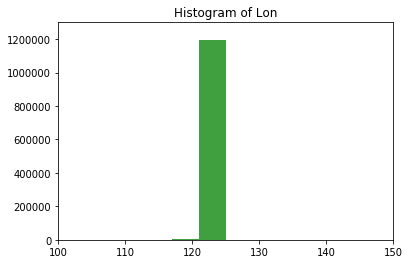

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline


# the histogram of the data
plt.hist(data['lon'], 1000, facecolor='g', alpha=0.75)


#plt.xlabel('Smarts')
#plt.ylabel('Probability')
plt.title('Histogram of Lon')
plt.axis([100, 150, 0, 1300000])
#plt.grid(True)
plt.show()

In [16]:
grid_info = pd.read_csv('data/grid_info.csv')

In [17]:
grid_info

,grid_id,latitude_range,longitude_range
0,1,31.195~31.2,121.315~121.32
1,2,31.22~31.225,121.355~121.36
2,3,31.26~31.265,121.485~121.49
3,4,31.15~31.155,121.51~121.515
4,5,31.19~31.195,121.77~121.775
5,6,31.23~31.235,121.37~121.375
6,7,31.22~31.225,121.41~121.415
7,8,31.15~31.155,121.48~121.485
8,9,31.265~31.27,121.485~121.49
9,10,31.205~31.21,121.55~121.555
